# Sale Prediction Using Time Series Analysis And Forecast

_Brinda Dhingra_

_Kadambari Chikara_

_Deepanshu Sharma_

### Aim: To predict the Sales of a given item in a given store on a given date 

We use the walmart sales data available to us on https://www.kaggle.com/competitions/m5-forecasting-accuracy

The given data is provided us to in 4 files:

1.calendar.csv - _Contains information about the dates on which the products are sold._

2.sales_train_validation.csv - _Contains the historical daily unit sales data per product and store [d_1 - d_1913]_

3.sell_prices.csv - _Contains information about the price of the products sold per store and date._

4.sales_train_evaluation.csv - _Includes sales [d_1 - d_1941]_

_In this project we are going to use two datasets, sales train evaluation and calendar_

## Importing the data

_Importing the required libraries_

In [68]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [69]:
import seaborn as sns
from matplotlib import colors
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

import plotly.express as px
import plotly.graph_objects as go
import plotly.figure_factory as ff
from plotly.subplots import make_subplots

In [70]:
from tqdm.notebook import tqdm as tqdm
import scipy
import statsmodels
#from scipy import signal
import statsmodels.api as sm
from prophet import Prophet
#from scipy.signal import butter, deconvolve
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing

_Importing the datasets using pandas_

## Exploratory Data Analysis

Evaluating the structure and quality of the data.

1. Sales data

In [71]:
sales_train_eval.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0


In [72]:
sales_train_eval

,id,item_id,dept_id,cat_id,store_id,state_id,d_1,d_2,d_3,d_4,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001_CA_1_evaluation,HOBBIES_1_001,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002_CA_1_evaluation,HOBBIES_1_002,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003_CA_1_evaluation,HOBBIES_1_003,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004_CA_1_evaluation,HOBBIES_1_004,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005_CA_1_evaluation,HOBBIES_1_005,HOBBIES_1,HOBBIES,CA_1,CA,0,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823_WI_3_evaluation,FOODS_3_823,FOODS_3,FOODS,WI_3,WI,0,0,2,2,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824_WI_3_evaluation,FOODS_3_824,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825_WI_3_evaluation,FOODS_3_825,FOODS_3,FOODS,WI_3,WI,0,6,0,2,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826_WI_3_evaluation,FOODS_3_826,FOODS_3,FOODS,WI_3,WI,0,0,0,0,...,1,1,1,4,6,0,1,1,1,0


We can see that the given data is time series data, where the columns show the sales from day 1 to day 1941
We will now define a variable for day columns so we can work with them

In [73]:
#Non d cols
sales_train_eval.columns[:6]

Index(['id', 'item_id', 'dept_id', 'cat_id', 'store_id', 'state_id'], dtype='object')

In [74]:
non_d_cols = sales_train_eval.columns[:6]

In [75]:
ids = sorted(list(set(sales_train_eval['id'])))
d_cols = [c for c in sales_train_eval.columns if 'd_' in c]

### Data Dictionary

In the given data each row represents aa unique item in a unique store in a unique state

<table>
    <tr>
        <th>Field Name</th><th>Description</th>
    </tr>
    <tr>
        <td>id</td><td>This field refers to the unique id of the store. Each entry in this table has a unique id</td>
    </tr>
    <tr>
        <td>item_id</td><td>This field refers to the unique item id,<br>one item may be present in multiple states/ stores so it may repeat</td>
    </tr>
    <tr>
        <td>dept_id</td><td>This field refers to the department which the item belongs to</td>
    </tr>
    <tr>
        <td>cat_id</td><td>the id of the category of item(food/hobby etc)</td>
    </tr>
    <tr>
        <td>store_id</td><td>This refers to the id of the store where the time series was recorded </td>
    </tr>
    <tr>
        <td>state_id</td><td>The state where it was sold</td>
    </tr>
</table>

In [76]:
print("In the dataset, there are:")
print(f"- {sales_train_eval.state_id.nunique()} states: {sales_train_eval.state_id.unique().tolist()}.")
print(f"- {sales_train_eval.store_id.nunique()} stores: {sales_train_eval.store_id.unique().tolist()}.")
print(f"- {sales_train_eval.cat_id.nunique()} categories: {sales_train_eval.cat_id.unique()}.")
print(f"- {sales_train_eval.dept_id.nunique()} departments: {sales_train_eval.dept_id.unique().tolist()}.")
print(f"- {sales_train_eval.item_id.nunique()} items.")

print(f"Total Number of Time Series: {sales_train_eval.id.nunique()}.")

In the dataset, there are:
- 3 states: ['CA', 'TX', 'WI'].
- 10 stores: ['CA_1', 'CA_2', 'CA_3', 'CA_4', 'TX_1', 'TX_2', 'TX_3', 'WI_1', 'WI_2', 'WI_3'].
- 3 categories: ['HOBBIES' 'HOUSEHOLD' 'FOODS'].
- 7 departments: ['HOBBIES_1', 'HOBBIES_2', 'HOUSEHOLD_1', 'HOUSEHOLD_2', 'FOODS_1', 'FOODS_2', 'FOODS_3'].
- 3049 items.
Total Number of Time Series: 30490.


In [77]:
sales_train_val = sales_train_eval

## Data Visualisations

## Distribution Of Data

In [78]:

store_data = sales_train_val['store_id'].value_counts().iloc[0:]
 

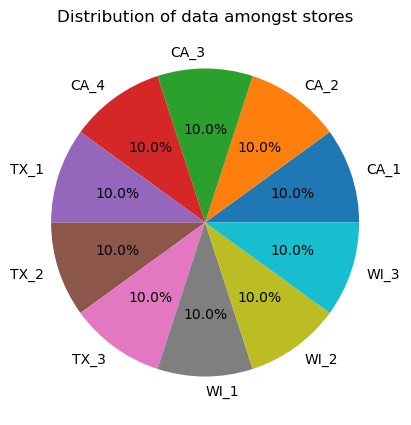

In [79]:
fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot()
ax.pie(x=store_data.values,
       labels=store_data.index,
       radius=1,
       autopct='%1.1f%%')
ax.set_title('Distribution of data amongst stores')
plt.show()

In [80]:
dept_data = sales_train_val['dept_id'].value_counts().iloc[0:]

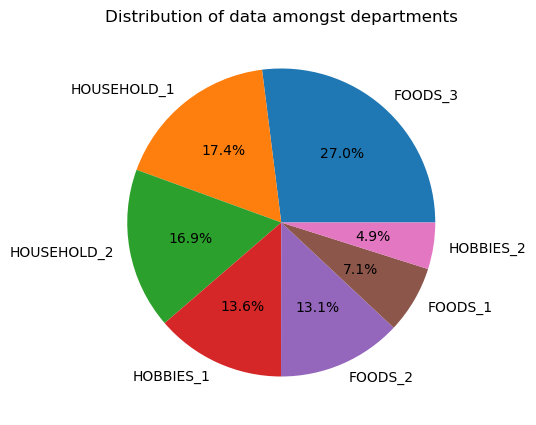

In [81]:
fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot()
ax.pie(x=dept_data.values,
       labels=dept_data.index,
       radius=1,
       autopct='%1.1f%%')
ax.set_title('Distribution of data amongst departments')
plt.show()

In [82]:
state_data = sales_train_val['state_id'].value_counts().iloc[0:]

In [83]:
state_data

CA    12196
TX     9147
WI     9147
Name: state_id, dtype: int64

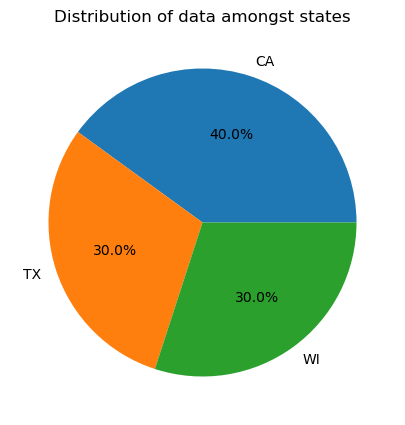

In [84]:
fig = plt.figure(figsize=(11, 5))
ax = fig.add_subplot()
ax.pie(x=state_data.values,
       labels=state_data.index,
       radius=1,
       autopct='%1.1f%%')
ax.set_title('Distribution of data amongst states')
plt.show()

In [85]:
fig = px.line(x=np.arange(1941), y=sales_train_eval.loc[100][d_cols].values,title="Sample Time Series")
fig.show()

## Memory Reduction to increase the speed of computation

In [86]:
initial_memory = sales_train_val.memory_usage().sum()/(1024**2)
d_cols = [col for col in sales_train_val.columns if "d_" in col]
### sales_train_validation[d_cols].max().max()
sales_train_val[d_cols] = sales_train_val[d_cols].astype(np.int32)   # int16 may create issues
final_memory = sales_train_val.memory_usage().sum()/(1024**2)
memory_reduction = (initial_memory - final_memory)/ initial_memory
print(f"Memory Reduction: {round(initial_memory - final_memory, 2)}MB ({round(100*memory_reduction, 2)}%)")

Memory Reduction: 0.0MB (0.0%)


## Splitting Data into Train and Test

Before we make our main models we will create a miniature training and validation set to train and validate our models. We will use the last 30 days' sales as the validation data and the sales of the 70 days before that as the training data. We need to predict the sales in the validation data using the sales in the training data.

In [87]:
train_dataset = sales_train_val[d_cols[-100:-30]]
val_dataset = sales_train_val[d_cols[-30:]]

In [88]:
cols = []
cols.append( 'item_id')
cols.append( 'store_id')
for i in d_cols[-100:]:
    cols.append(i)

In [89]:
sales_merged = sales_train_val[cols]

In [90]:
sales_merged

,item_id,store_id,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,HOBBIES_1_001,CA_1,4,0,0,0,0,1,1,2,...,2,4,0,0,0,0,3,3,0,1
1,HOBBIES_1_002,CA_1,0,0,0,1,0,0,0,1,...,0,1,2,1,1,0,0,0,0,0
2,HOBBIES_1_003,CA_1,1,0,0,0,1,0,1,0,...,1,0,2,0,0,0,2,3,0,1
3,HOBBIES_1_004,CA_1,2,1,0,0,0,2,0,5,...,1,1,0,4,0,1,3,0,2,6
4,HOBBIES_1_005,CA_1,5,2,2,2,1,0,0,0,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,FOODS_3_823,WI_3,0,0,0,1,0,0,3,0,...,1,0,3,0,1,1,0,0,1,1
30486,FOODS_3_824,WI_3,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,FOODS_3_825,WI_3,0,1,1,1,1,0,0,1,...,0,0,1,2,0,1,0,1,0,2
30488,FOODS_3_826,WI_3,1,2,3,3,0,2,1,0,...,1,1,1,4,6,0,1,1,1,0


In [91]:
train_dataset

,d_1842,d_1843,d_1844,d_1845,d_1846,d_1847,d_1848,d_1849,d_1850,d_1851,...,d_1902,d_1903,d_1904,d_1905,d_1906,d_1907,d_1908,d_1909,d_1910,d_1911
0,4,0,0,0,0,1,1,2,0,4,...,0,1,1,3,0,1,1,1,3,0
1,0,0,0,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,1,0,0,0,1,0,1,0,1,0,...,1,2,2,1,2,1,1,1,0,1
3,2,1,0,0,0,2,0,5,4,2,...,3,0,1,0,5,4,1,0,1,3
4,5,2,2,2,1,0,0,0,3,0,...,1,1,2,1,1,0,1,1,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,0,0,1,0,0,3,0,0,0,...,0,0,2,0,0,0,0,0,1,0
30486,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30487,0,1,1,1,1,0,0,1,0,0,...,0,0,2,1,0,2,0,1,0,0
30488,1,2,3,3,0,2,1,0,0,0,...,0,3,0,0,1,0,0,1,0,3


In [92]:
val_dataset

,d_1912,d_1913,d_1914,d_1915,d_1916,d_1917,d_1918,d_1919,d_1920,d_1921,...,d_1932,d_1933,d_1934,d_1935,d_1936,d_1937,d_1938,d_1939,d_1940,d_1941
0,1,1,0,0,0,2,0,3,5,0,...,2,4,0,0,0,0,3,3,0,1
1,0,0,0,1,0,0,0,0,0,0,...,0,1,2,1,1,0,0,0,0,0
2,1,1,0,0,1,1,0,2,1,0,...,1,0,2,0,0,0,2,3,0,1
3,7,2,0,0,1,2,4,1,6,4,...,1,1,0,4,0,1,3,0,2,6
4,2,4,1,0,2,3,1,0,3,2,...,0,0,0,2,1,0,0,2,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30485,0,1,0,0,0,2,2,0,0,0,...,1,0,3,0,1,1,0,0,1,1
30486,1,0,0,1,1,1,0,0,0,0,...,0,0,0,0,0,0,1,0,1,0
30487,1,0,0,0,1,1,0,2,1,1,...,0,0,1,2,0,1,0,1,0,2
30488,1,3,1,3,0,1,2,1,0,2,...,1,1,1,4,6,0,1,1,1,0


The training dataset has the sales for the days 1842 to 1911
The validation dataset has the sales data for the days 1912 to 1941

## Plotting time series for the first four items

In [93]:
fig = make_subplots(rows=2, cols=2, subplot_titles=[sales_train_val.loc[0].item_id + sales_train_val.loc[0].store_id,
                                                    sales_train_val.loc[1].item_id + sales_train_val.loc[1].store_id, 
                                                    sales_train_val.loc[2].item_id + sales_train_val.loc[2].store_id,
                                                   sales_train_val.loc[3].item_id + sales_train_val.loc[3].store_id])

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[0].values, marker=dict(color="dodgerblue"), showlegend=False,
               name="Training Data"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[0].values, mode='lines', marker=dict(color="darkorange"), showlegend=False,
               name="Testing Data"),
    row=1, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[1].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[1].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=1, col=2
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[2].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[2].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=2, col=1
)

fig.add_trace(
    go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[3].values, marker=dict(color="dodgerblue"), showlegend=False),
    row=2, col=2
)

fig.add_trace(
    go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[3].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
    row=2, col=2
)

fig.update_layout(height=1200, width=1600, title_text="Train (blue) vs. Validation (orange) sales for four items")
fig.show()

## Data Preprocessing

Smoothening by binning- averages
We divide the data into bins, each bin having three observations and then apply averages. This is done to remove the zero values and this function is only applied in places where there is a zero value

In [94]:
def smooth(arr):
    smoothened=np.zeros(len(arr))
    for i in range(len(arr)):
        if(i!=0 and arr[i] != 0 and arr[i-1]!=0):
            smoothened[i] = arr[i]
        elif(i==0 and arr[i]!=0):
            smoothened[i] = arr[i]
        elif(arr[i] == 0):
            mean = (arr[i-1]+arr[i]+arr[i+1])/3
            smoothened[i-1]=mean
            smoothened[i]=mean
            smoothened[i+1] =mean
    return smoothened

Function to merge data

Function to extract Time Series

In [95]:
def get_ts_example(data, d_cols, item_id, store_id, idx=None):
    try:
        if idx is None:
            ts = data.loc[(data['item_id'] == item_id) & (data['store_id'] == store_id)]
            ts = ts[d_cols].T.reset_index()
            ts.columns = ['d', 'sales']
        else:
            ts = data.loc[idx][d_cols].reset_index()
            ts.columns = ['d', 'sales']
        # Make sure that sales column's type is int
        ts["sales"] = ts["sales"].astype("int")
        return ts
    except Exception as e:
        print(f'Can not extract time series: {e}')

In [96]:
ts = get_ts_example(sales_train_val, d_cols, item_id='FOODS_3_586', store_id='TX_3')

In [97]:
ts

,d,sales
0,d_1,115
1,d_2,116
2,d_3,71
3,d_4,66
4,d_5,66
...,...,...
1936,d_1937,29
1937,d_1938,39
1938,d_1939,92
1939,d_1940,83


In [98]:
smoothened = smooth(ts['sales'])


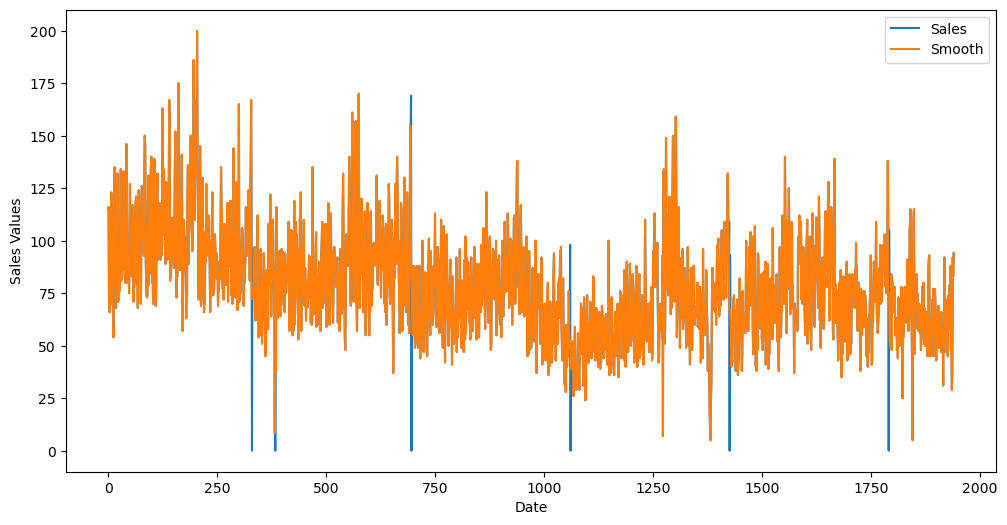

In [99]:
plt.figure(figsize = (12,6))
plt.plot(ts['sales'], label="Sales")
plt.plot(smoothened, label="Smooth")
plt.xlabel("Date")
plt.ylabel("Sales Values")
plt.legend()
plt.show()

## Error Metrics

### 1.MSE(Mean Square Error)

In [100]:
def mse(predictions, val_dataset):
    error= np.linalg.norm(predictions[:3] - val_dataset.values[:3])/len(predictions[0])
    return error

### 2.RMSE(Root Mean Square Error) 

In [101]:
def rmse(predictions, val_dataset):
    rmse2 = math.sqrt(mse(predictions, val_dataset))
    return rmse2

## Models

### Model 01: Naive Model

Our first model simply forecasts the sales value of the previous day as the sales value of the next day

<center><h4>$Y_{t+1}$ = $Y_{t}$</h4>

In [102]:
def model01(val_dataset):
    predictions = []
    for i in range(len(val_dataset.columns)):
        if i == 0:
            predictions.append(train_dataset[train_dataset.columns[-1]].values)
        else:
            predictions.append(val_dataset[val_dataset.columns[i-1]].values)

    predictions = np.transpose(np.array([row.tolist() for row in predictions]))
    return predictions

In [103]:
naivePredictions = model01(val_dataset)

In [104]:
mseNaive = mse(naivePredictions, val_dataset)

In [105]:
rmseNaive = rmse(naivePredictions, val_dataset)

In [106]:
print(mseNaive)
print(rmseNaive)

0.4255715111601235
0.6523584223110203


#### Plotting the values

In [107]:
#Function to plot predictions
def plotPredictions(predictions, title):
    pred_1 = predictions[0]
    pred_2 = predictions[1]
    pred_3 = predictions[2]
    pred_4 = predictions[3]

    fig = make_subplots(rows=2, cols=2, subplot_titles=[sales_train_val.loc[0].item_id + sales_train_val.loc[0].store_id,
                                                        sales_train_val.loc[1].item_id + sales_train_val.loc[1].store_id, 
                                                        sales_train_val.loc[2].item_id + sales_train_val.loc[2].store_id,
                                                       sales_train_val.loc[3].item_id + sales_train_val.loc[3].store_id])

    fig.add_trace(
        go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[0].values, marker=dict(color="dodgerblue"),
                   name="Train"),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[0].values, mode='lines', marker=dict(color="darkorange"),
                   name="Val"),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=np.arange(70, 100), y=pred_1, mode='lines', marker=dict(color="seagreen"),
                   name="Pred"),
        row=1, col=1
    )

    fig.add_trace(
        go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[1].values, marker=dict(color="dodgerblue"), showlegend=False),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[1].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x=np.arange(70, 100), y=pred_2, mode='lines', marker=dict(color="seagreen"), showlegend=False,
                   name="Val"),
        row=1, col=2
    )

    fig.add_trace(
        go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[2].values, marker=dict(color="dodgerblue"), showlegend=False),
        row=2, col=1
    )

    fig.add_trace(
        go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[2].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
        row=2, col=1
    )

    fig.add_trace(
        go.Scatter(x=np.arange(70, 100), y=pred_3, mode='lines', marker=dict(color="seagreen"), showlegend=False,
                   name="Pred"),
        row=2, col=1
    )
    fig.add_trace(
        go.Scatter(x=np.arange(70), mode='lines', y=train_dataset.loc[3].values, marker=dict(color="dodgerblue"), showlegend=False),
        row=2, col=2
    )

    fig.add_trace(
        go.Scatter(x=np.arange(70, 100), y=val_dataset.loc[3].values, mode='lines', marker=dict(color="darkorange"), showlegend=False),
        row=2, col=2
    )

    fig.add_trace(
        go.Scatter(x=np.arange(70, 100), y=pred_4, mode='lines', marker=dict(color="seagreen"), showlegend=False,
                   name="Val"),
        row=2, col=2
    )

    fig.update_layout(height=1200, width=1600, title_text=title)
    fig.show()

In [108]:
plotPredictions(naivePredictions, "Naive Model")

### Model 02: Simple Moving Averages

This approach calculates the mean sales over the previous n  days and forecasts that as the next day's sales. This method takes the previous n timesteps into consideration, and is therefore less prone to short term fluctuations than the naive approach. The model can be summarized as follows:

$\hat{Y}_{t+1} = 1/n \sum \limits _{j=t-n} ^{t} Y_{j} $

In [109]:
def simpleMovingAverages2(n):
    predicted = []
    for i in range(len(val_dataset)):
        df0 = get_ts_example(sales_merged, d_cols[-100:], item_id=None, store_id=None, idx=sales_merged.index[i])
        predicted.append(df0['sales'].rolling(n).mean())
    return predicted
    

In [110]:
p10 = simpleMovingAverages2(10)
pred10 = []
for i in range(len(p10)):
    pred10.append(p10[i][-30:])


rmse10 = rmse(pred10, val_dataset)

print(rmse10)
plotPredictions(pred10, "Simple Moving Averages 10")

0.5468923258853932


In [111]:
p22 = simpleMovingAverages2(2)
predA = []
for i in range(len(p22)):
    predA.append(p22[i][-30:])
rmse2A = rmse(predA, val_dataset)
print(rmse2A)
plotPredictions(predA, "Simple Moving Averages 2")

0.46128706418028


In [112]:
p5 = simpleMovingAverages2(5)
pred5 = []
for i in range(len(p5)):
    pred5.append(p5[i][-30:])
rmse5 = rmse(pred5, val_dataset)
print(rmse5)
plotPredictions(predA, "Simple Moving Averages 5")

0.5436886275237003


In [113]:
p50 = simpleMovingAverages2(50)
pred50 = []
for i in range(len(p50)):
    pred50.append(p50[i][-30:])
rmse50 = rmse(pred50, val_dataset)
print(rmse50)
plotPredictions(pred50, "Simple Moving Averages 50")

0.557412654097324


In [114]:
error = [rmse2A, rmse5, rmse10, rmse50]
print(error)
windowSize = ["2","5","10", "50" ]
fig = px.bar( y=error, x=windowSize, color=windowSize, title="RMSE Loss vs. Window Size")

fig.update_layout(yaxis_range=[0.4,0.6])

[0.46128706418028, 0.5436886275237003, 0.5468923258853932, 0.557412654097324]


From this we see that we get the highest RMSE value when the window size is 2
This is what we will use to compare our model with the other models

In [115]:
rmseSMA = rmse2A
rmseSMA

0.46128706418028

## Model 03: Exponentially Weighted Moving Averages

This method uses a different type of smoothing which differs from average smoothing. The previous time steps are exponentially weighted and added up to generate the forecast. The weights decay as we move further backwards in time. The model can be summarized as follows:



<img src="https://i.imgur.com/IqqjOFc.png" width="520px">
<img src="https://i.imgur.com/GiyHyZf.png" width="255px">

In [116]:
def ewma(train_dataset):
    predictions = []
    for row in tqdm(train_dataset[train_dataset.columns[-30:]].values[:4]):
        fit = ExponentialSmoothing(row, seasonal_periods=4).fit()
        predictions.append(fit.forecast(30))
    predictions = np.array(predictions).reshape((-1, 30))
    return predictions

In [117]:
ewmaPredictions = ewma(val_dataset)
plotPredictions(ewmaPredictions, "Exponentially Weighted Moving Averages")
rmseewma = rmse(ewmaPredictions, val_dataset)
mseewma = mse(ewmaPredictions, val_dataset)
print(rmseewma)
print(mseewma)

  0%|          | 0/4 [00:00<?, ?it/s]

0.5599291723371687
0.31352067803418676


## Model 04: SARIMAX

ARIMA stands for Auto Regressive Integrated Moving Average. While exponential smoothing models were based on a description of trend and seasonality in data, ARIMA models aim to describe the correlations in the time series.

In [118]:
def arima():
    predictions = []
    for row in tqdm(train_dataset[train_dataset.columns[-30:]].values[:4]):
        fit = sm.tsa.statespace.SARIMAX(row, seasonal_order=(0, 1, 1, 7)).fit()
        predictions.append(fit.forecast(30))
    predictions = np.array(predictions).reshape((-1, 30))
    return predictions

In [119]:
arimapredictions = arima()
plotPredictions(arimapredictions, "SARIMAX")
rmsearima = rmse(arimapredictions, val_dataset)
msearima = mse(arimapredictions, val_dataset)
print(rmsearima)
print(msearima)

  0%|          | 0/4 [00:00<?, ?it/s]

C:\Users\dhing\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1009: UserWarning:

Non-invertible starting seasonal moving average Using zeros as starting parameters.



0.5559005376998406
0.3090254078149719


## Model 05: Facebooks Prophet Model

In [120]:
dates = ["2007-12-" + str(i) for i in range(1, 31)]
predictions = []
for row in tqdm(train_dataset[train_dataset.columns[-30:]].values[:4]):
    df = pd.DataFrame(np.transpose([dates, row]))
    df.columns = ["ds", "y"]
    model = Prophet(daily_seasonality=True)
    model.fit(df)
    future = model.make_future_dataframe(periods=30)
    forecast = model.predict(future)["yhat"].loc[30:].values
    predictions.append(forecast)
predictions = np.array(predictions).reshape((-1, 30))
error_prophet = np.linalg.norm(predictions[:4] - val_dataset.values[:4])/len(predictions[0])

  0%|          | 0/4 [00:00<?, ?it/s]

13:44:25 - cmdstanpy - INFO - Chain [1] start processing
13:44:25 - cmdstanpy - INFO - Chain [1] done processing
13:44:26 - cmdstanpy - INFO - Chain [1] start processing
13:44:26 - cmdstanpy - INFO - Chain [1] done processing
13:44:27 - cmdstanpy - INFO - Chain [1] start processing
13:44:27 - cmdstanpy - INFO - Chain [1] done processing
13:44:28 - cmdstanpy - INFO - Chain [1] start processing
13:44:28 - cmdstanpy - INFO - Chain [1] done processing


In [121]:

mseProphet = error_prophet
rmseProphet = math.sqrt(mseProphet)
plotPredictions(predictions, "FBProphet")
print(mseProphet)
print(rmseProphet)

0.4902222747329388
0.7001587496653446


In [122]:
error = [rmseNaive, rmseSMA, rmseewma,rmsearima,rmseProphet]
print(error)
names = ["Naive approach", "Moving averages", "Exponential smoothing", "SARIMAX", "Prophet"]
df = pd.DataFrame(np.transpose([error, names]))

df.columns = ["RMSE Loss", "Model"]
print(df)
fig = px.bar( y=error, x=names, color=names, title="RMSE Loss vs. Model")

fig.update_layout(yaxis_range=[0.4,0.8])

[0.6523584223110203, 0.46128706418028, 0.5599291723371687, 0.5559005376998406, 0.7001587496653446]
            RMSE Loss                  Model
0  0.6523584223110203         Naive approach
1    0.46128706418028        Moving averages
2  0.5599291723371687  Exponential smoothing
3  0.5559005376998406                SARIMAX
4  0.7001587496653446                Prophet


From the above graph, we can see that the two smoothing methods: moving average and SARIMAX are the best-scoring models.  Naive approach and Prophet are the worst-scoring models. We believe that the accuracy of SARIMAX and Prophet can be boosted significantly by tuning the hyperparameters.

## Final Error

In [123]:
def mse(predictions, val_dataset):
    error= np.linalg.norm(predictions - val_dataset.values)/len(predictions[0])
    return error

In [124]:
mse2 = mse(predA, val_dataset)
print(math.sqrt(mse2))

6.467554362337222


Future Works to improve the model

-Use calendar data and features to map predictions to a ML model such as XGBoost

-Use ratios in moving averages across years to predict seasonal change

-Perform Hyper parameter tuning for window size of moving averages